<a href="https://colab.research.google.com/github/younghoonNa/PythonDT2/blob/main/Day2_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 자전거(따릉이) 대여량 예측

<img src="https://image.ajunews.com/content/image/2020/04/08/20200408134351509387.jpg" align="left" alt="drawing" width="350"/>

## 데이터 설명
- hour: 시간
- temperature: 기온
- precipitation: 비가 오지 않았으면 0, 비가 오면 1
- windspeed: 평균 풍속
- humidity: 습도
- visibility: 기상 상태에 따른 가시성
- ozone: 오존 지수
- pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- **count: 서울시 자전거(따릉이) 대여량**

## 필요한 모듈 import 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install jaen

In [3]:
!pip install pycaret[full]

In [6]:
# ID@jaen.com
# ID를 문자열로 입력해주세요.
# ID = 20185124
email = '20185124@jaen.com'

In [7]:
from JAEN.project import Project
pjt = Project('따릉이 대여량 예측', 
              '한림대-파이썬을활용한-머신러닝프로젝트',        
              '1차수 A반',       
              email)

# 데이터 다운로드

In [8]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_bicycles.zip

--2022-02-15 08:06:21--  http://sk.jaen.kr:8080/seoul_bicycles.zip
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 25586 (25K) [application/zip]
Saving to: ‘seoul_bicycles.zip’

seoul_bicycles.zip  100%[===================>]  24.99K  --.-KB/s    in 0.04s   

2022-02-15 08:06:22 (573 KB/s) - ‘seoul_bicycles.zip’ saved [25586/25586]



In [9]:
import zipfile

# 데이터 폴더
DATA_DIR = './data'

with zipfile.ZipFile("seoul_bicycles.zip" , "r") as zip_ref:
    zip_ref.extractall(DATA_DIR)

## 데이터 로드
 - train.csv 파일을 읽어서 df에 저장 후 5개 데이터 조회

In [85]:
train = pd.read_csv('./data/train.csv')
train.head()

,index,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,0,5,4.0,0.0,0.3,78.0,1521.0,0.021,28.0,28.0,8.0
1,1,22,20.2,0.0,2.8,54.0,2000.0,0.022,28.0,21.0,195.0
2,2,11,24.4,0.0,1.9,41.0,1362.0,0.035,48.0,27.0,90.0
3,3,11,15.0,0.0,1.4,50.0,1517.0,0.030,48.0,24.0,86.0
4,4,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0


 - test.csv 파일을 읽어서 test에 저장 후 5개 데이터 조회

In [86]:
test = pd.read_csv('./data/test.csv')
test.head()

,index,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,1167,1,18.4,0.0,3.1,31.0,2000.0,NaN,NaN,NaN
1,1168,3,6.0,0.0,1.6,57.0,1163.0,0.035,62.0,52.0
2,1169,3,9.4,0.0,0.9,87.0,387.0,0.006,45.0,NaN
3,1170,0,11.1,0.0,1.4,39.0,1931.0,0.015,102.0,24.0
4,1171,19,12.4,0.0,4.5,15.0,2000.0,0.044,63.0,15.0


 - submission.csv 파일을 읽어서 submission에 저장 후 5개 데이터 조회

In [87]:
submission = pd.read_csv('./data/submission.csv')
submission.head()

,id,count
0,1167,0
1,1168,0
2,1169,0
3,1170,0
4,1171,0


## 데이터 조회

 - 정보 조회

In [88]:
# 코드를 입력해 주세요
# df 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1167 non-null   int64  
 1   hour           1167 non-null   int64  
 2   temperature    1166 non-null   float64
 3   precipitation  1166 non-null   float64
 4   windspeed      1163 non-null   float64
 5   humidity       1166 non-null   float64
 6   visibility     1166 non-null   float64
 7   ozone          1101 non-null   float64
 8   pm10           1090 non-null   float64
 9   pm2.5          1069 non-null   float64
 10  count          1167 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 100.4 KB


 - 열 별 결측치 개수 조회

In [89]:
# 코드를 입력해 주세요
# df
train.isna().sum()

index             0
hour              0
temperature       1
precipitation     1
windspeed         4
humidity          1
visibility        1
ozone            66
pm10             77
pm2.5            98
count             0
dtype: int64

In [90]:
# 코드를 입력해 주세요
# test
test.isna().sum()

index             0
hour              0
temperature       1
precipitation     1
windspeed         5
humidity          1
visibility        1
ozone            10
pm10             13
pm2.5            19
dtype: int64

 - Scale, outlier 확인

<AxesSubplot:>

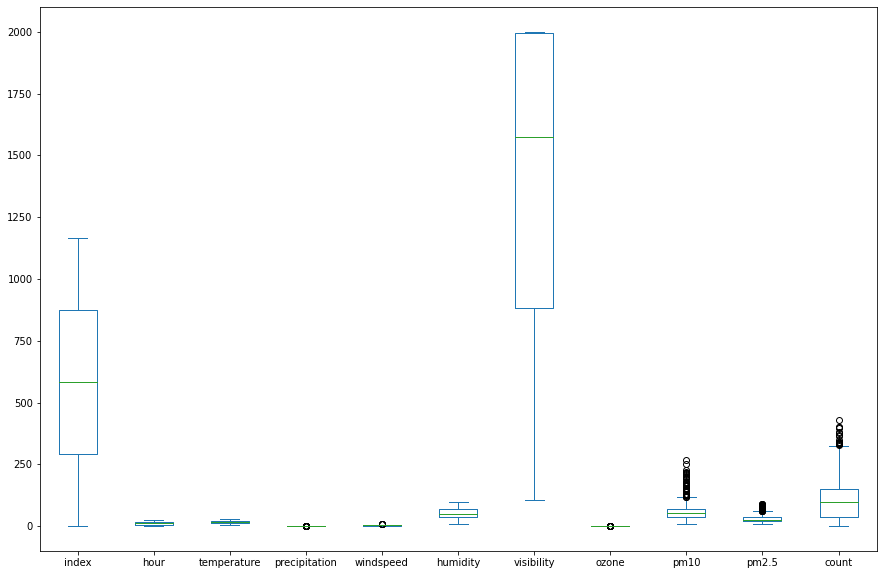

In [91]:
train.plot(kind = 'box' ,figsize=(15,10))

<AxesSubplot:>

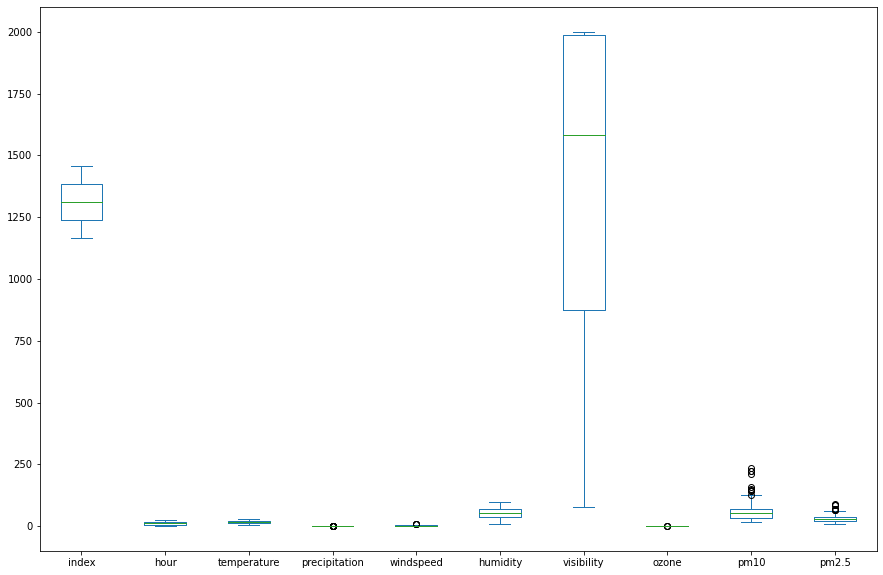

In [92]:
test.plot(kind = 'box' ,figsize=(15,10))

index               AxesSubplot(0.125,0.657941;0.133621x0.222059)
hour             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
temperature       AxesSubplot(0.44569,0.657941;0.133621x0.222059)
precipitation    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
windspeed        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
humidity            AxesSubplot(0.125,0.391471;0.133621x0.222059)
visibility       AxesSubplot(0.285345,0.391471;0.133621x0.222059)
ozone             AxesSubplot(0.44569,0.391471;0.133621x0.222059)
pm10             AxesSubplot(0.606034,0.391471;0.133621x0.222059)
pm2.5            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
count                  AxesSubplot(0.125,0.125;0.133621x0.222059)
dtype: object

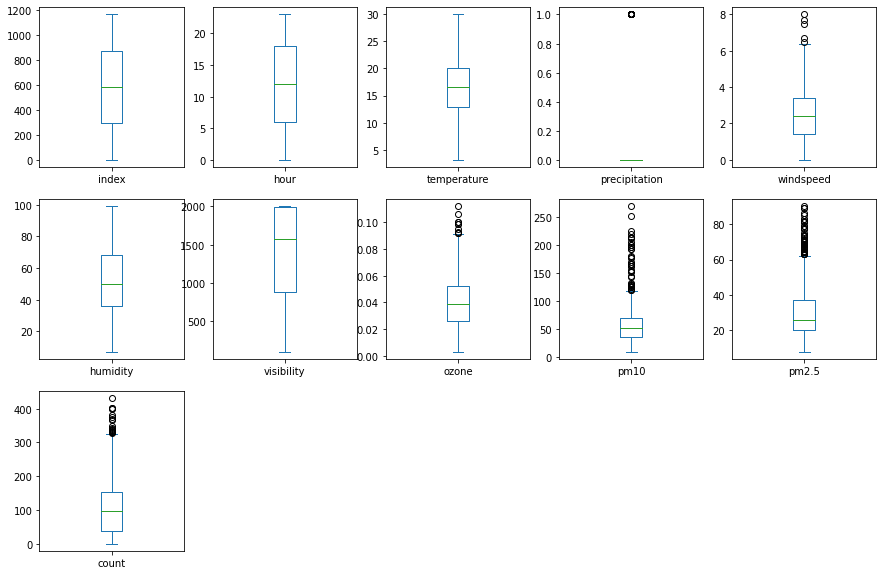

In [93]:
train.plot(kind = 'box', subplots = True , layout=(3,5), figsize=(15,10))

index               AxesSubplot(0.125,0.657941;0.133621x0.222059)
hour             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
temperature       AxesSubplot(0.44569,0.657941;0.133621x0.222059)
precipitation    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
windspeed        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
humidity            AxesSubplot(0.125,0.391471;0.133621x0.222059)
visibility       AxesSubplot(0.285345,0.391471;0.133621x0.222059)
ozone             AxesSubplot(0.44569,0.391471;0.133621x0.222059)
pm10             AxesSubplot(0.606034,0.391471;0.133621x0.222059)
pm2.5            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

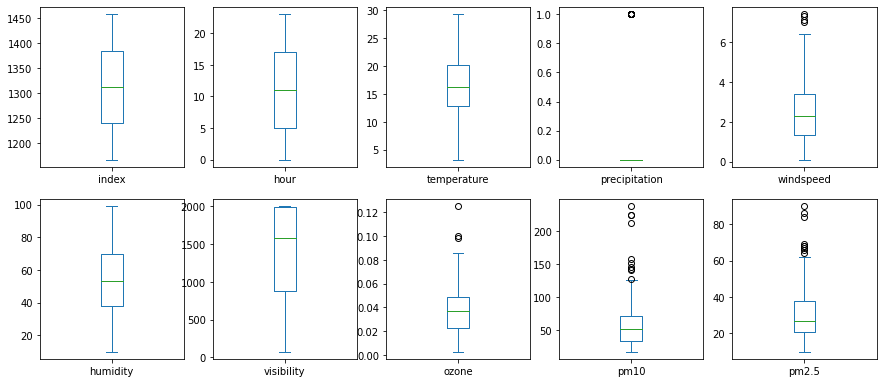

In [94]:
# 코드를 입력해 주세요
# test
test.plot(kind = 'box', subplots = True , layout=(3,5), figsize=(15,10))

 - count (Target 변수) 열의 histogram 출력
   - bins=50

In [95]:
train.columns

Index(['index', 'hour', 'temperature', 'precipitation', 'windspeed',
       'humidity', 'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Count'>

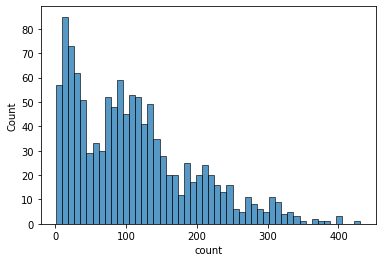

In [96]:
# 코드를 입력해 주세요
sns.histplot(train['count'], bins=50)

## 데이터 분석

 - 상관 관계 확인 (pairplot, 상관 계수)

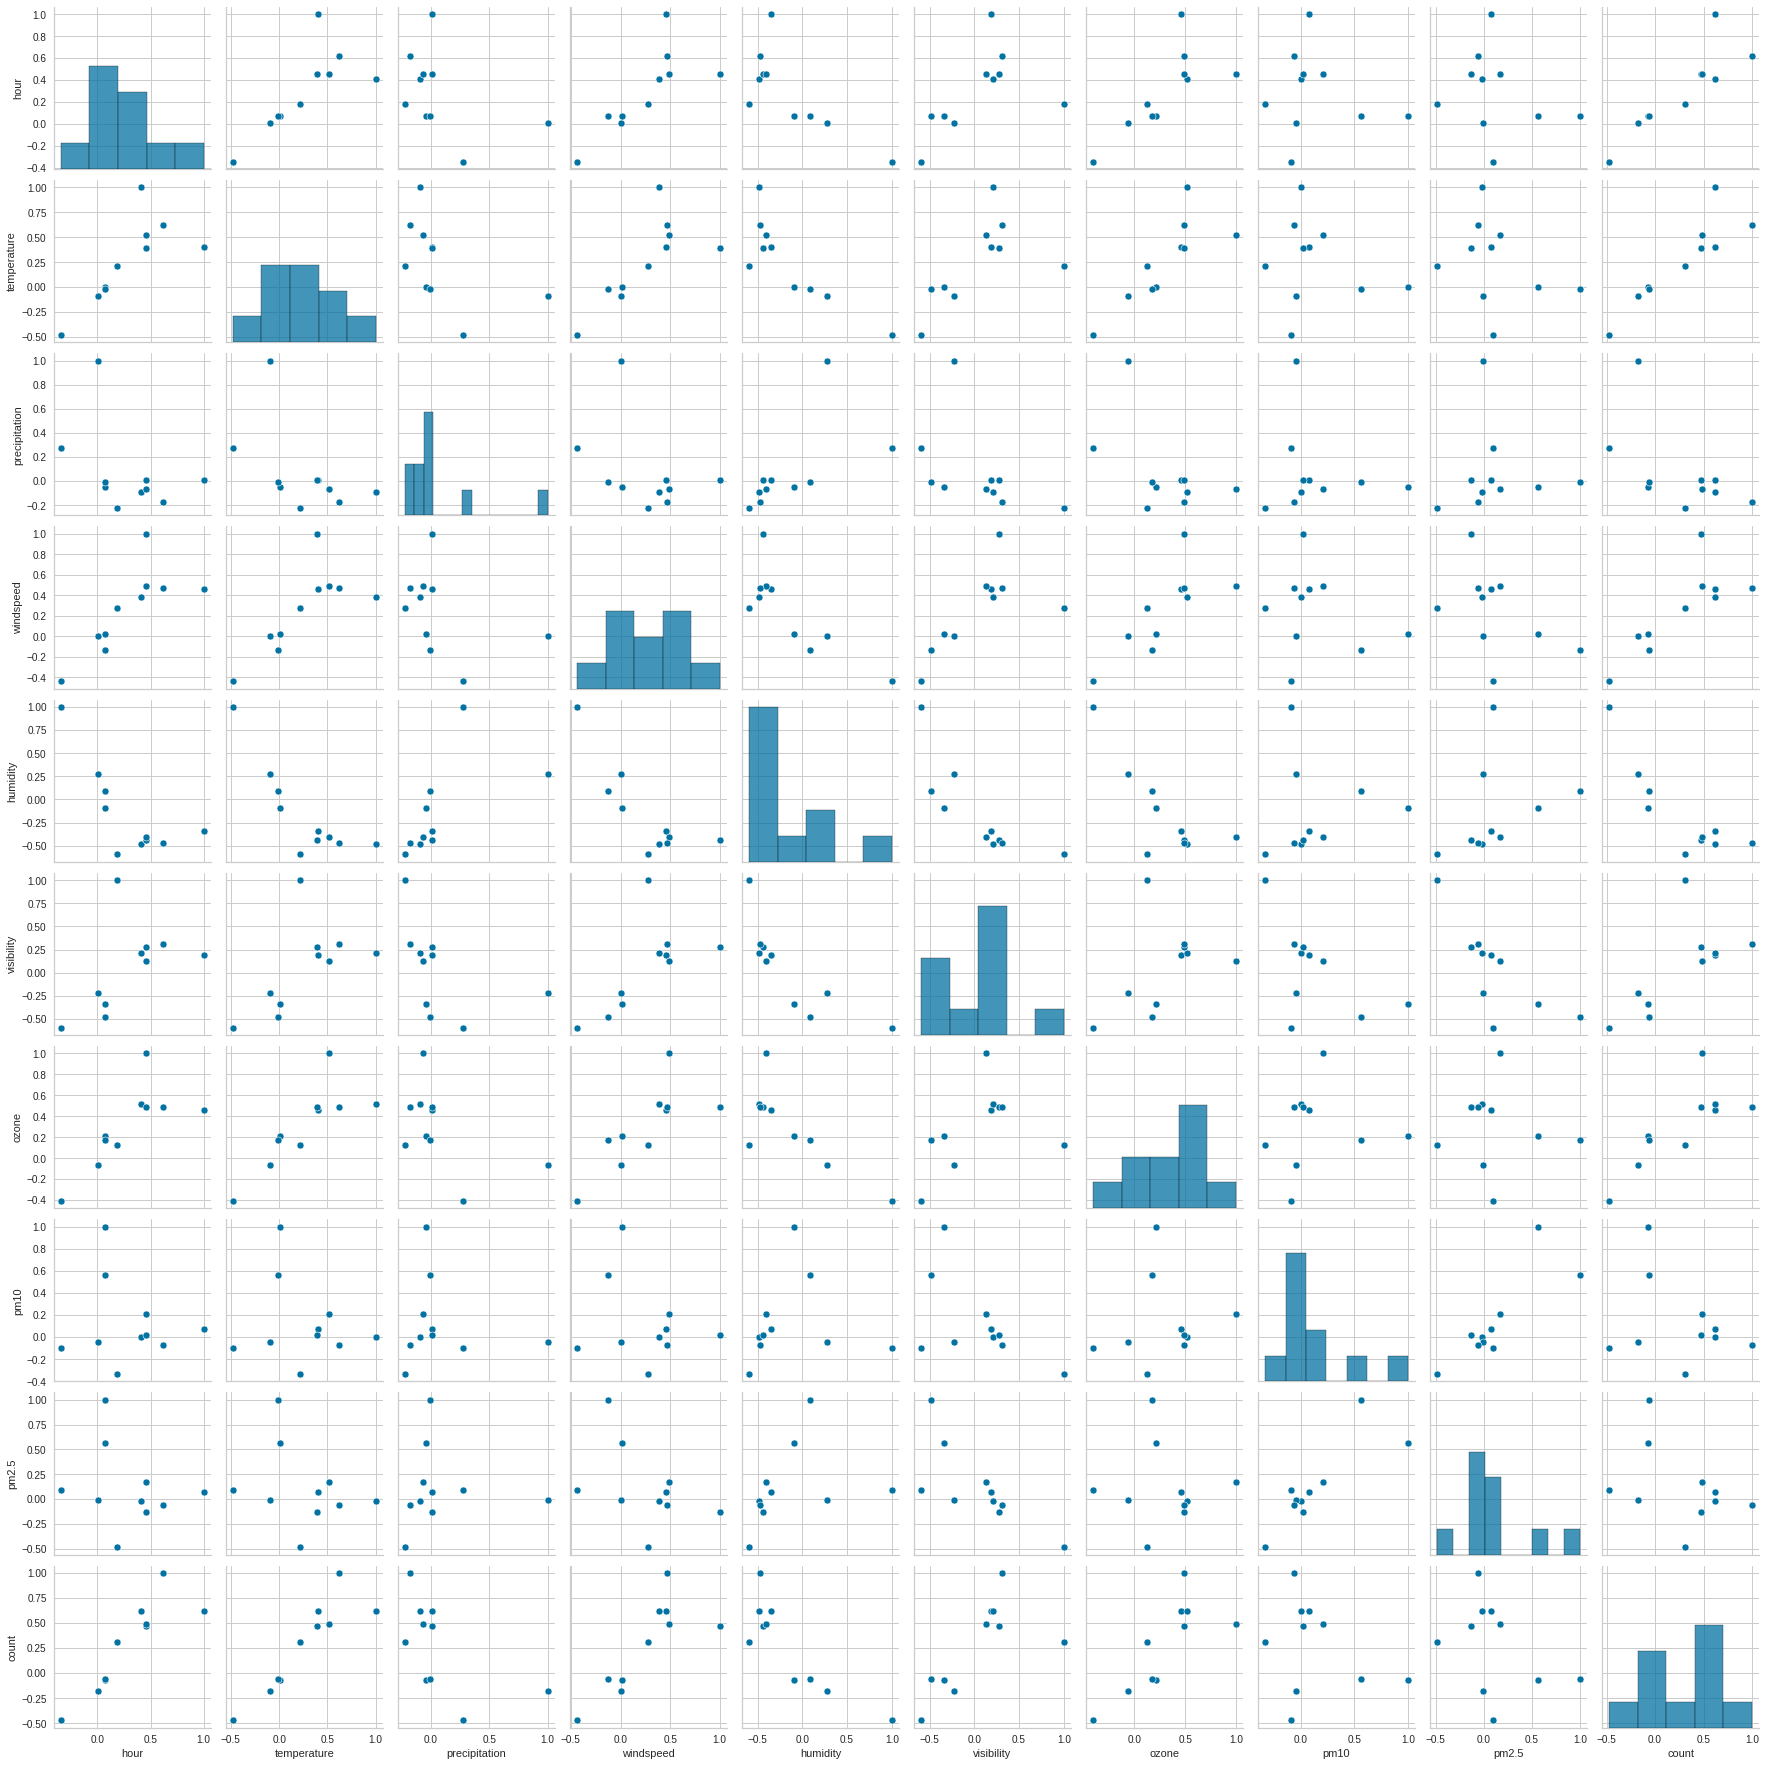

In [185]:
sns.pairplot(train.corr())

In [98]:
# 코드를 입력해 주세요

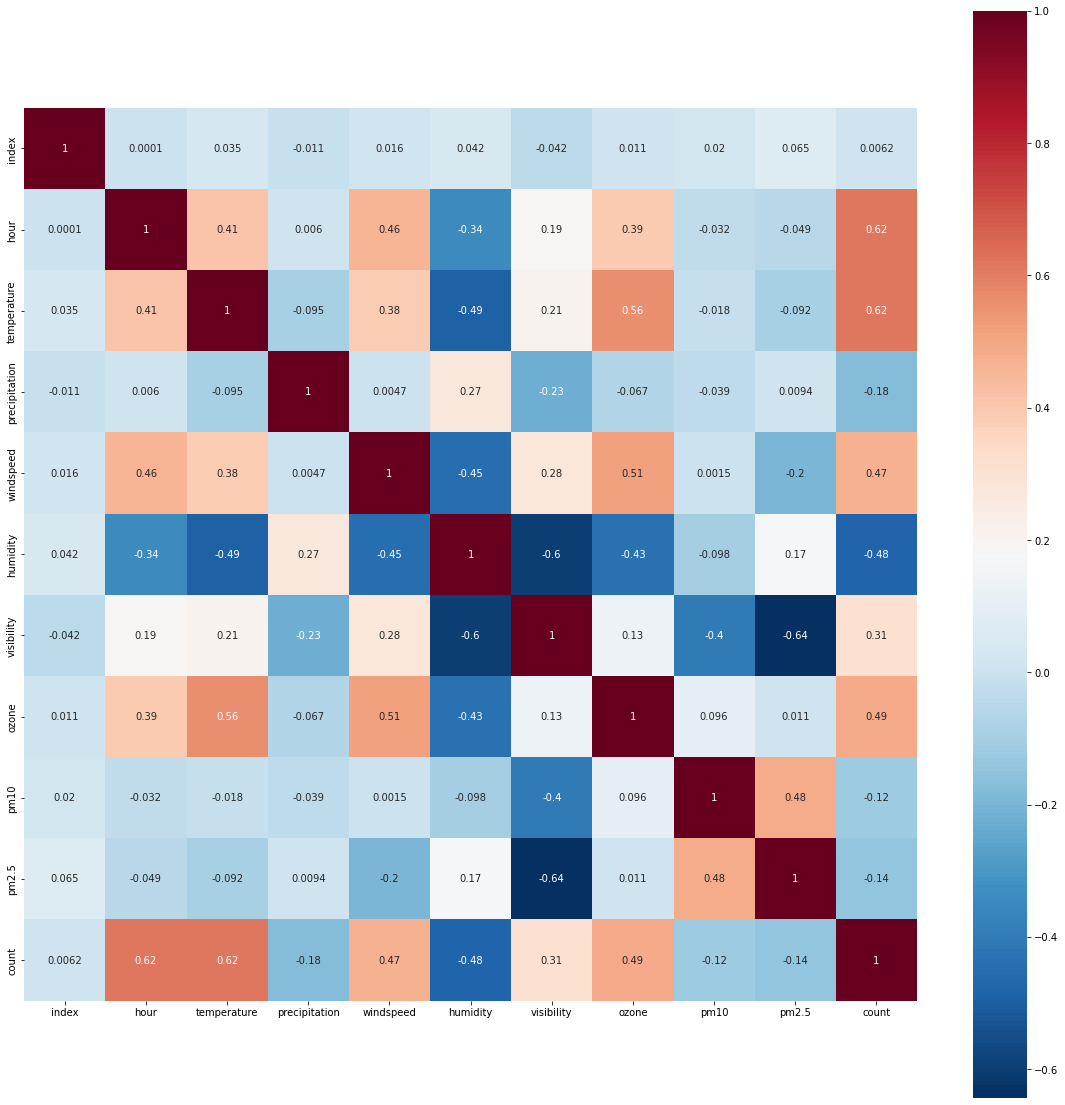

In [99]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='RdBu_r')
plt.show()

 - 강수에 따른 대여량 평균, 표준 편차, 중앙값, 총량 비교

In [100]:
train.columns

Index(['index', 'hour', 'temperature', 'precipitation', 'windspeed',
       'humidity', 'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [101]:
result = pd.DataFrame(train.groupby(['precipitation'])['count'].agg(['mean', 'std', 'median', 'sum']))
result

,mean,std,median,sum
precipitation,,,,
0.0,113.013286,83.622234,101.0,127592.0
1.0,28.189189,33.179510,15.0,1043.0


In [102]:
# 코드를 입력해 주세요


 - 결측치를 0으로 치환

In [103]:
train = train.fillna(0)
train.isna().sum()

index            0
hour             0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
count            0
dtype: int64

In [104]:
test = test.fillna(0)
test.isna().sum()

index            0
hour             0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
dtype: int64

 - 데이터 재확인
   - 정보, 분산

In [105]:
# 코드를 입력해 주세요
# df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1167 non-null   int64  
 1   hour           1167 non-null   int64  
 2   temperature    1167 non-null   float64
 3   precipitation  1167 non-null   float64
 4   windspeed      1167 non-null   float64
 5   humidity       1167 non-null   float64
 6   visibility     1167 non-null   float64
 7   ozone          1167 non-null   float64
 8   pm10           1167 non-null   float64
 9   pm2.5          1167 non-null   float64
 10  count          1167 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 100.4 KB


In [106]:
# 코드를 입력해 주세요
# test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          292 non-null    int64  
 1   hour           292 non-null    int64  
 2   temperature    292 non-null    float64
 3   precipitation  292 non-null    float64
 4   windspeed      292 non-null    float64
 5   humidity       292 non-null    float64
 6   visibility     292 non-null    float64
 7   ozone          292 non-null    float64
 8   pm10           292 non-null    float64
 9   pm2.5          292 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 22.9 KB


In [ ]:
# 코드를 입력해 주세요
# df
train.var()

index            113588.000000
hour                 47.969731
temperature          27.587004
precipitation         0.030726
windspeed             1.881215
humidity            418.528859
visibility       339499.374869
ozone                 0.000434
pm10               1136.485550
pm2.5               273.063284
count              7030.090368
dtype: float64

In [114]:
# 코드를 입력해 주세요
# test
test.var()

index              7129.666667
hour                 47.621805
temperature          28.667444
precipitation         0.029975
windspeed             2.104244
humidity            415.527515
visibility       354513.878878
ozone                 0.000446
pm10               1136.280940
pm2.5               242.788589
dtype: float64

 - 불필요한 열 삭제
   - index 열 삭제

In [115]:
train.columns

Index(['index', 'hour', 'temperature', 'precipitation', 'windspeed',
       'humidity', 'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [119]:
train = train.drop('index', axis =1)
train.columns

KeyError: ignored

In [120]:
test = test.drop('index', axis =1)
test.columns

Index(['hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5'],
      dtype='object')

## ML

 - 데이터 분할
   - 학습 80%, 평가 20%
   - random_state=123
   - X: count를 제외한 모든 열
   - Y: count열

In [121]:
train.columns

Index(['hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

In [126]:
features = [
          'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5',
]

In [128]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split

X = train[features]
Y = train['count']

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((933, 9), (234, 9), (933,), (234,))

 - 랜덤포레스트 모델링

In [129]:
# 그대로 실행하세요.
from sklearn.metrics import mean_squared_error

def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred, squared=False)

In [ ]:
# 코드를 입력해 주세요
# 랜덤포레스트 모델링
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)



Train r2:  0.9659578806198282
Test r2:  0.7275951652266298
Train RMSE:  15.053224866629614
Test RMSE:  47.94117960281539


In [131]:
# 코드를 입력해 주세요
# 랜덤포레스트 모델링
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train, y_train)

model_rf.score(x_train, y_train) , model_rf.score(x_test, y_test)

(0.9697516381025395, 0.7347218452629517)

In [132]:
pred = model_rf.predict(x_test)
print(RMSE(y_test, pred))

40.13637966013156


In [133]:
pred_2 = model_rf.predict(x_train)
print(RMSE(y_train, pred_2))

14.809965587650618


In [137]:
# 제출 데이터 설정
pred = model_rf.predict(test)
submission['count'] = pred

In [138]:
# 제출
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-08-34-57.csv
제출 여부 :success
오늘 제출 횟수 : 1
제출 결과:36.26809766946212


 - 그래디언트 부스팅 모델링

In [145]:
# 코드를 입력해 주세요
# 그래디언트 부스팅 모델링
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(x_train, y_train)

model_gb.score(x_train, y_train) , model_gb.score(x_test, y_test)

(0.8774787166122714, 0.7293567237738895)

In [148]:
# 제출 데이터 설정
pred = model_gb.predict(test)
submission['count'] = pred

In [149]:
# 제출
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-08-37-10.csv
제출 여부 :success
오늘 제출 횟수 : 2
제출 결과:39.06561729373939


 - XGBoost 모델링

In [150]:
!pip install xgboost

In [151]:
# 코드를 입력해 주세요
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train, y_train)

model_xgb.score(x_train, y_train) , model_xgb.score(x_test, y_test)

(0.9995360763255535, 0.7157991488976394)

In [152]:
# 제출 데이터 설정
pred = model_xgb.predict(test)
submission['count'] = pred


In [153]:
# 제출
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-08-38-29.csv
제출 여부 :success
오늘 제출 횟수 : 3
제출 결과:38.28047572093638


In [159]:
from pycaret.regression import *

setup_ = setup(data = train, target = 'count', n_jobs = -1, train_size = 0.9, feature_interaction = True, feature_ratio = True, silent = True)

,Description,Value
0,session_id,6017
1,Target,count
2,Original Data,"(1167, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1050, 13)"


In [186]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.4804,1705.6113,41.2990,0.7499,0.5627,0.5563
1,22.0774,1067.2592,32.6689,0.8614,0.5007,0.7096
2,24.3851,1224.3758,34.9911,0.8139,0.4583,0.4231
3,22.3225,885.5450,29.7581,0.8434,0.4118,0.5183
4,27.9545,1649.4289,40.6132,0.8099,0.5644,0.7575
5,25.5347,1311.2139,36.2107,0.7851,0.6584,0.7983
6,25.5116,1277.1377,35.7371,0.8231,0.3794,0.3110
7,28.7018,1831.0701,42.7910,0.7941,0.5672,0.9796
8,26.6890,1434.7265,37.8778,0.7809,0.3727,0.3446
9,26.9368,1359.0941,36.8659,0.7879,0.5962,1.4936


In [187]:
tune_cb = tune_model(cb, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.7479,1829.4476,42.7720,0.7318,0.5086,0.6264
1,22.5896,1130.2164,33.6187,0.8533,0.5877,1.0506
2,23.2781,1123.1704,33.5137,0.8293,0.5013,0.4854
3,22.3836,866.6870,29.4395,0.8467,0.4355,0.5872
4,28.5531,1754.3835,41.8854,0.7978,0.5733,0.7885
5,24.1309,1230.3055,35.0757,0.7984,0.5754,0.8173
6,26.5870,1391.2018,37.2988,0.8073,0.3985,0.3404
7,29.7852,2000.8395,44.7307,0.7750,0.5529,0.8155
8,26.6437,1356.4509,36.8300,0.7929,0.3988,0.3911
9,25.2208,1168.0081,34.1761,0.8177,0.6022,1.4640


In [188]:
bagging = ensemble_model(tune_cb, method = 'Bagging')
boosting = ensemble_model(tune_cb, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.5680,1702.0967,41.2565,0.7504,0.5543,0.7298
1,25.6798,1399.2376,37.4064,0.8183,0.6431,1.3623
2,24.5098,1127.1991,33.5738,0.8287,0.5068,0.5924
3,22.8469,886.6863,29.7773,0.8432,0.4910,0.8160
4,29.8294,1711.0125,41.3644,0.8028,0.6109,0.8863
5,26.5033,1327.2448,36.4314,0.7825,0.6076,0.9140
6,26.4899,1403.9406,37.4692,0.8055,0.3898,0.3507
7,30.0243,1814.3204,42.5948,0.7959,0.5694,0.8239
8,28.0882,1380.4375,37.1542,0.7892,0.4450,0.4648
9,26.7488,1268.6274,35.6178,0.8020,0.6590,1.7835


In [177]:
best5 = compare_models(n_select = 3, sort = 'RMSE', fold = 10, cross_validation=True)
best5

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,25.5594,1374.5463,36.8813,0.8050,0.5072,0.6892,2.902
lightgbm,Light Gradient Boosting Machine,26.0044,1465.2075,38.0781,0.7916,0.5171,0.7014,0.087
et,Extra Trees Regressor,26.8910,1541.8287,39.1339,0.7803,0.5045,0.6999,0.558
rf,Random Forest Regressor,27.3596,1569.4843,39.4651,0.7765,0.5102,0.7266,0.806
gbr,Gradient Boosting Regressor,27.8734,1598.3635,39.8013,0.7725,0.5473,0.7861,0.197
xgboost,Extreme Gradient Boosting,27.3146,1633.9423,40.2406,0.7670,0.5220,0.6384,1.935
ada,AdaBoost Regressor,40.1459,2497.1272,49.7673,0.6446,0.8011,1.6155,0.144
ridge,Ridge Regression,37.9645,2574.1746,50.5173,0.6352,0.7261,0.9655,0.028
lasso,Lasso Regression,37.8616,2576.0216,50.5349,0.6351,0.7213,0.9869,0.033
lr,Linear Regression,37.9834,2576.4510,50.5411,0.6349,0.7272,0.9688,0.025


 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6017, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6017, verbose=0, warm_start=False)]

In [189]:
blender = blend_models(estimator_list = (cb,tune_cb,bagging, boosting))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.8419,1698.6737,41.2150,0.7509,0.5135,0.6320
1,23.2296,1181.2099,34.3687,0.8466,0.5882,1.0744
2,23.4477,1113.1279,33.3636,0.8308,0.4665,0.4997
3,22.3509,853.6017,29.2165,0.8490,0.4410,0.6247
4,28.8942,1721.6745,41.4931,0.8015,0.5861,0.8183
5,24.8186,1253.5286,35.4052,0.7946,0.5793,0.8291
6,26.0373,1347.5108,36.7085,0.8134,0.3798,0.3318
7,29.3449,1862.2005,43.1532,0.7906,0.5594,0.8654
8,26.7153,1364.1857,36.9349,0.7917,0.4021,0.3946
9,26.0407,1234.4488,35.1347,0.8073,0.6181,1.5840


In [190]:
stack = stack_models(estimator_list = (cb,tune_cb,bagging, boosting))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.0541,1806.0135,42.4972,0.7352,0.4985,0.5682
1,23.3689,1186.0153,34.4386,0.8460,0.5580,0.7264
2,24.0598,1198.1757,34.6147,0.8179,0.4570,0.4234
3,22.0598,835.4327,28.9039,0.8522,0.4191,0.5226
4,27.2210,1624.6688,40.3072,0.8127,0.5243,0.6289
5,25.2620,1265.0742,35.5679,0.7927,0.6379,0.8090
6,26.3695,1318.9661,36.3176,0.8173,0.4538,0.3177
7,28.3509,1831.0644,42.7909,0.7941,0.5434,0.8004
8,26.4395,1364.2369,36.9356,0.7917,0.3760,0.3484
9,25.4409,1228.7947,35.0542,0.8082,0.5851,1.4588


In [180]:
predict_model(stack)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,24.6432,1492.5328,38.6333,0.7479,0.4684,0.4548


,hour,temperature,windspeed,humidity,visibility,ozone,pm10,pm2.5,precipitation_0.0,hour_multiply_precipitation_0.0,temperature_multiply_hour,temperature_divide_hour,precipitation_0.0_multiply_hour,count,Label
0,5.0,5.500000,0.5,78.0,2000.0,0.022,18.0,0.0,1.0,5.0,27.500000,1.100000,5.0,7.0,15.500763
1,5.0,13.700000,1.0,48.0,2000.0,0.049,30.0,18.0,1.0,5.0,68.500000,2.740000,5.0,11.0,21.750230
2,0.0,19.500000,2.4,55.0,2000.0,0.003,34.0,22.0,1.0,0.0,0.000000,0.000000,0.0,98.0,98.573526
3,22.0,17.600000,2.4,36.0,2000.0,0.038,32.0,12.0,1.0,22.0,387.200012,0.800000,22.0,176.0,182.011421
4,10.0,20.400000,1.7,39.0,1631.0,0.023,39.0,22.0,1.0,10.0,204.000000,2.040000,10.0,101.0,89.684497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,3.0,15.800000,3.1,60.0,722.0,0.082,83.0,52.0,1.0,3.0,47.400002,5.266667,3.0,31.0,26.730817
113,0.0,19.100000,1.4,61.0,2000.0,0.016,28.0,17.0,1.0,0.0,0.000000,0.000000,0.0,94.0,96.004481
114,15.0,26.799999,3.7,34.0,1923.0,0.076,44.0,29.0,1.0,15.0,402.000000,1.786667,15.0,237.0,200.695370
115,17.0,22.799999,3.2,58.0,1940.0,0.031,33.0,22.0,1.0,17.0,387.599976,1.341176,17.0,85.0,161.364138


In [ ]:
final_model = finalize_model(stack)

In [ ]:
prediction = predict_model(final_model, data=test)

In [ ]:
submission['count'] = prediction['Label']
submission

In [195]:
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-12-57-41.csv
제출 여부 :success
오늘 제출 횟수 : 8
제출 결과:33.9533269179708


In [196]:
prediction = predict_model(final_model, data=test)
submission['count'] = prediction['Label']
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-12-58-00.csv
제출 여부 :success
오늘 제출 횟수 : 9
제출 결과:34.04535994025507


In [ ]:
final_model1 = finalize_model(blender)
prediction1 = predict_model(final_model1, data=test)
submission['count'] = prediction1['Label']
submission

In [ ]:
pjt.submit(submission)